# Problem Set 2, due April 26 at 3:30pm.

## Introduction to the assignment

For this assignment, you will be using data from the [Progresa program](http://en.wikipedia.org/wiki/Oportunidades), a government social assistance program in Mexico. This program, as well as the details of its impact, are described in the paper "[School subsidies for the poor: evaluating the Mexican Progresa poverty program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)", by Paul Shultz (available on Canvas). Please familiarize yourself with the PROGRESA program before beginning this problem set, so you have a rough sense of where the data come from and how they were generated. If you just proceed into the problem set without understanding Progresa or the data, it will be very difficult!

The goal of this problem set is to implement some of the basic econometric techniques that you are learning in class to measure the impact of Progresa on secondary school enrollment rates. The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of data collected in 1998
 * "Wave 2 of data" collected in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
When you are ready, download the progresa_sample.csv data from Canvas. The data are actual data collected to evaluate the impact of the Progresa program.  In this file, each row corresponds to an observation taken for a given child for a given year. There are two years of data (1997 and 1998), and just under 40,000 children who are surveyed in both years.  For each child-year observation, the following variables are collected:

| Variable name | Description|
|------|------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = "pobre"|
|progresa |treatment = "basal"|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	|gender of head of household (male=1)|
|hohage	|age of head of household|
|age	|years old|
|folnum	|individual id|
|village|	village id|
|sc97	|schooling in 1997|

---

## Part 1: Descriptive analysis

### 1.1	Summary Statistics

Present summary statistics (mean and standard deviation) for all of the demographic variables in the dataset (i.e., everything except year, folnum, village). Present these in a single table alphabetized by variable name. Do NOT simply expect the grader to scroll through your output!

In [164]:
# importing modules
import pandas as pd
from pandas import DataFrame,Series
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

In [178]:
# read in the file
progresa = pd.read_csv("progresa_sample.csv")
progresa_df = progresa.drop(['year', 'folnum', 'village'], axis=1)

summary = pd.DataFrame([progresa_df.mean(), progresa_df.std()])
summary = summary.T
summary.columns = ['Mean', 'Standard Deviation']
summary = summary.sort_index()
summary

,Mean,Standard Deviation
age,11.366460,3.167744
dist_cap,147.674452,76.063134
dist_sec,2.418910,2.234109
fam_n,7.215715,2.352900
grc,3.963537,2.499063
grc97,3.705372,2.572387
hohage,44.436717,11.620372
hohedu,2.768104,2.656106
hohsex,0.925185,0.263095
hohwag,586.985312,788.133664


### 1.2 Differences at baseline?

Are the baseline (1997) demographic characteristics **for the poor**  different in treatment and control villages? Hint: Use a T-Test to determine whether there is a statistically significant difference in the average values of each of the variables in the dataset. Focus only on the data from 1997 for individuals who are poor (i.e., poor=='pobre').

Present your results in a single table with the following columns and 14 (or so) rows:

| Variable name | Average value (Treatment villages) | Average value (Control villages) | Difference (Treat - Control) | p-value |
|------|------|------|------|------|
|Male|?|?|?|?|


In [107]:
treatment_village = progresa.loc[(progresa['poor'] == 'pobre') & (progresa['year'] == 97) & (progresa['progresa'] == 'basal')]
control_village = progresa.loc[(progresa['poor'] == 'pobre') & (progresa['year'] == 97) & (progresa['progresa'] != 'basal')]

treatment_village = treatment_village.drop(['poor', 'year', 'progresa'], axis = 1)
control_village = control_village.drop(['poor', 'year', 'progresa'], axis = 1)

baseline = pd.DataFrame(columns= ['Variable name', 'Average value (Treatment villages)','Average value (Control villages)','Difference (Treat - Control)','p-value'])
cols = [col for col in treatment_village]

for i in cols:
    treatment_average = treatment_village[i].mean()
    control_average = control_village[i].mean()
    
    baseline.set_value(cols.index(i),'Variable name', i)
    baseline.set_value(cols.index(i), 'Average value (Treatment villages)', treatment_average)
    baseline.set_value(cols.index(i), 'Average value (Control villages)', control_average)
    
    t = stats.ttest_ind(treatment_village[i], control_village[i], nan_policy='omit')
    
    baseline.set_value(cols.index(i), 'Difference (Treat - Control)', treatment_average - control_average)
    baseline.set_value(cols.index(i), 'p-value', t.pvalue)
baseline.sort_values(by=['Variable name'], ascending = True)


,Variable name,Average value (Treatment villages),Average value (Control villages),Difference (Treat - Control),p-value
13,age,10.717,10.742,-0.025032,0.478559
7,dist_cap,150.829,153.77,-2.94066,0.000841501
2,dist_sec,2.45312,2.50766,-0.0545398,0.0356984
5,fam_n,7.28133,7.30247,-0.0211419,0.427104
15,folnum,19321.2,19272.8,48.3239,0.703108
4,grc,3.5316,3.54305,-0.0114503,0.689015
16,grc97,3.5316,3.54305,-0.0114503,0.689015
12,hohage,43.6488,44.2769,-0.62809,1.79624e-06
8,hohedu,2.66314,2.59035,0.0727912,0.0110509
11,hohsex,0.924656,0.922947,0.00170878,0.571186


### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages as baseline? 
* B: Why does it matter if there are differences at baseline?
* C: What does this imply about how to measure the impact of the treatment?

A: Yes, for some of the variables, there seems to be statistically significant differences between treatment and control villages as baseline. They have p-values that are under a standard alpha of 0.05.

B: It matters if there are differences at baseline because if there are already differences before treatment and you find that there are differences after treatment, you cannot attribute the change from the treatment.

C: This implies that we cannot accurately conclude that treatment was the cause for any changes between the two groups because there were already differences in the beginning. The two groups should be more similar at baseline in order for us to more accurately make conclusions after our analysis.

### 1.4 Graphical exploration, part 1

For each level of household head education, compute the average enrollment rate in 1997. Create a scatterplot that shows this relationship. What do you notice?

(0, 1.5)

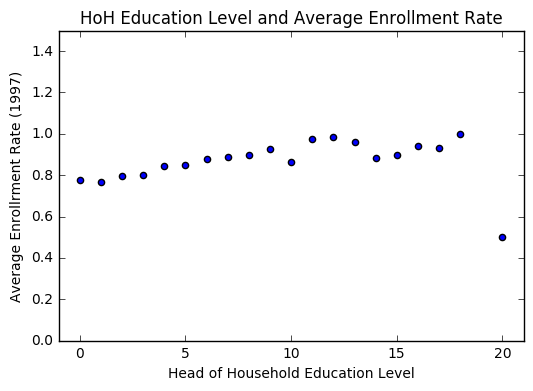

In [115]:
y = progresa[progresa['year'] == 97].groupby('hohedu').mean()['sc']
x = y.index

plt.scatter(x, y)
plt.title('HoH Education Level and Average Enrollment Rate')
plt.xlabel('Head of Household Education Level')
plt.xlim([-1,21])
plt.ylabel('Average Enrollrment Rate (1997)')
plt.ylim([0,1.5])

From this scatter plot we see that for the most part, there seems to be a linear relationship between a HoH Education. Overall, there is a positive linear relationship between the two variables; as education level goes up, the average enrollment rate in 1997 also tends to go up as well. There is a slight dip at levels 10 and 14. There is also an extreme outlier at a HoH Education Level of 20 which could affect a linear regression line.

### 1.5 Graphical exploration, part 2

Create a histogram of village enrollment rates **among poor households in treated villages**, before and after treatment. Specifically, for each village, calculate the average rate of enrollment of poor households in treated villages in 1997, then compute the average rate of enrollment of poor households in treated villages in 1998. Create two separate histograms showing the distribution of these average enrollments rates, one histogram for 1997 and one histogram for 1998. On each histogram, draw a vertical line that intersects the x-axis at the average value (across all households). Does there appear to be a difference? Is this difference statistically significant?

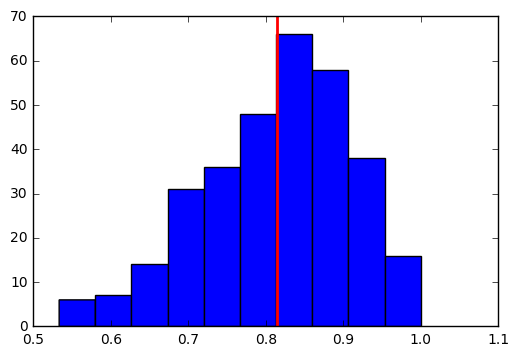

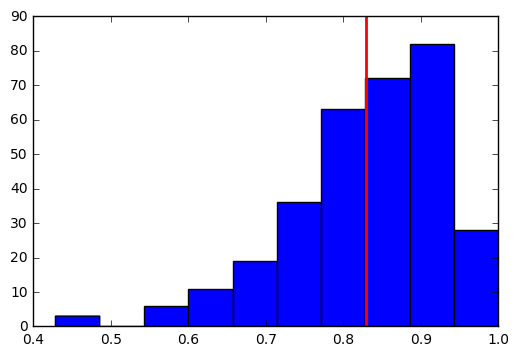

In [175]:
enrollment_after_97 = progresa.loc[(progresa['poor'] == 'pobre') & (progresa['year'] == 97) & (progresa['progresa'] == 'basal')].groupby('village').mean()['sc']
enrollment_after_98 = progresa.loc[(progresa['poor'] == 'pobre') & (progresa['year'] == 98) & (progresa['progresa'] == 'basal')].groupby('village').mean()['sc']

enrollment_before_97 = progresa.loc[(progresa['poor'] == 'pobre') & (progresa['year'] == 97) & (progresa['progresa'] != 'basal')].groupby('village').mean()['sc']
enrollment_before_98 = progresa.loc[(progresa['poor'] == 'pobre') & (progresa['year'] == 98) & (progresa['progresa'] != 'basal')].groupby('village').mean()['sc']

plt.figure(1)
plt.hist(enrollment_after_97)
plt.axvline(enrollment_after_97.mean(), color ='r', linewidth=2)
plt.figure(2)
plt.hist(enrollment_after_98)
plt.axvline(enrollment_after_98.mean(), color ='r', linewidth=2)

Does there appear to be a difference? Is this difference statistically significant?
- From the histograms, it appears that the averages for the two groups are similar. However, when caluclating the pvalue below, we get a pvalue of 0.044 which is less than 0.05, so the two averages are statistically significant. The first histogram (97 data) shows less of a skew than the bottom graph(98 data), but both are visibilly skewed.

In [192]:
thist = stats.ttest_ind(enrollment_after_97, enrollment_after_98, nan_policy='omit')
thist.pvalue

0.04424870036572115

## Part 2: Measuring Impact

Our goal is to estimate the causal impact of the PROGRESA program on the social and economic outcomes of individuals in Mexico. We will focus on the impact of the program on the poor (those with poor=='pobre'), since only the poor were eligible to receive the PROGRESA assistance.

### 2.1 Simple differences: T-test

Begin by estimating the impact of Progresa using "simple differences." Restricting yourself to data from 1998 (after treatment), calculate the average enrollment rate among **poor** households in the Treatment villages and the average enrollment rate among **poor** households in the control villages. Use a t-test to determine if this difference is statistically significant. What do you conclude?

In [125]:
treatment_village_98 = progresa.loc[(progresa['year'] == 98) & (progresa['progresa'] == 'basal') & (progresa['poor'] == 'pobre')]
control_village_98 = progresa.loc[(progresa['year'] == 98) & (progresa['progresa'] != 'basal') & (progresa['poor'] == 'pobre')]

t_test = stats.ttest_ind(control_village_98['sc'], treatment_village_98['sc'], nan_policy='omit')
t_test

Ttest_indResult(statistic=-8.3587205674183735, pvalue=6.6363444473781018e-17)

I calculated a p-value of 6.636e-17. This value is less than alpha (which we can take to be 0.05). From this, we can conclude that there is a statistically significant difference between the average enrollment rate of poor households in treatment and control villages after treatment was given. So, it appears that Progressa made a difference in average enrollment rates.

### 2.2 Simple differences: Regression

Estimate the effects of Progresa on enrollment using a regression model, by regressing the 1998 enrollment rates **of the poor** on treatment assignment. Discuss the following:

* Based on this model, how much did Progresa increase the likelihood of a child enrolling?
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

In [73]:
poor_98 = progresa.loc[(progresa['year'] == 98) & (progresa['poor'] == 'pobre')]
regression = sm.formula.ols(formula='sc ~ progresa', data=poor_98).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     69.87
Date:                Tue, 25 Apr 2017   Prob (F-statistic):           6.64e-17
Time:                        15:02:57   Log-Likelihood:                -11926.
No. Observations:               27450   AIC:                         2.386e+04
Df Residuals:                   27448   BIC:                         2.387e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             0.8076      0.004    220.676      0.000         0.800     0.815
progresa[T.basal]     0.0388      0.005      8.359      0.000         0.030     0.048
==============================================================================
Omnibus:                     7638.939   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15767.534
Skew:                          -1.767   Prob(JB):                         0.00
Kurtosis:                       4.140   Cond. No.                         3.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on this model, how much did Progresa increase the likelihood of a child enrolling?
- Based on this model, Progresa increased the likelihood of a child enrolling by 0.0388 (~4%).

How does your regression estimate compare to your t-test estimate from part 2.1?
- The regression estimate is extremely close, if not the exact same, to the t-test estimate from part 2.1. The regression estimate that I got was 6.64e-17 and from the t-test I got 6.636e-17.

Based on this regression model, can we reject the null hypothesis that the treatment effects are zero?
- From this regression model, we can reject the null hypothesis that the treatment effects are zero because our p-value is less than a standard alpha of 0.05. So, treatment appears to make a difference.

What is the counterfactual assumption underlying this regression?
- The counterfactual assumption underlying this regression is that there weren't differences already between treatment and control groups for baseline. 

### 2.3 Multiple Regression

Re-run the above regression estimated but this time include a set of control variables. Include, for instance, age, distance to a secondary school, gender, education of household head, welfare index, indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?

In [117]:
regression = sm.formula.ols(formula='sc ~ progresa + age + dist_sec + sex + hohedu + welfare_index + indig', data=poor_98).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     1419.
Date:                Tue, 25 Apr 2017   Prob (F-statistic):               0.00
Time:                        17:04:14   Log-Likelihood:                -7639.4
No. Observations:               27267   AIC:                         1.529e+04
Df Residuals:                   27259   BIC:                         1.536e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             1.5025      0.014    105.342      0.000         1.475     1.530
progresa[T.basal]     0.0352      0.004      8.799      0.000         0.027     0.043
age                  -0.0655      0.001    -95.105      0.000        -0.067    -0.064
dist_sec             -0.0117      0.001    -13.361      0.000        -0.013    -0.010
sex                   0.0310      0.004      7.977      0.000         0.023     0.039
hohedu                0.0085      0.001     10.951      0.000         0.007     0.010
welfare_index      3.227e-05   1.72e-05      1.872      0.061     -1.52e-06  6.61e-05
indig                 0.0468      0.004     11.283      0.000         0.039     0.055
==============================================================================
Omnibus:                     2993.090   Durbin-Watson:                   1.718
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4083.947
Skew:                          -0.940   Prob(JB):                         0.00
Kurtosis:                       3.248   Cond. No.                     4.90e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

How do the controls affect the point estimate of treatment effect?
- The controls slightly decreased the likelihood of Progressa causing a child to enroll. Without the control we calculated an estimate of Progresa increasing the likelihood by 0.0388 (~3.88%). With the controls we calculated an estimate of Progresa increasing the likelihood by 0.0352 (~3.52%). 

How do the controls affect the standard error on the treatment effect?
- The controls lowered the standard error on the treatment effect slightly. It went from 0.005 to 0.004.

How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?
- A big difference between my estimates in 2.2 and 2.3 was my R^2, which is a statistical measure of how close the data points are to the fitted regression line. It went from 0.003 without the controls to 0.267 with the controls. This means that with the controls, we calculated a better predictor / regression line. Since the coefficient for Progresa was pretty similar between the two, I would conclude that the other control variables used were better predictors for the enrollment rate.

### 2.4 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the difference in 1998 enrollment rates across villages. An alternative approach would be to compute the treatment effect using a difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate:
a) the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages
b) the difference (between 1997 and 1998) in enrollment rates among poor households in control villages.
c) The difference between these two differences is your estimate.

* What is your estimate of the impact, and how does it compare to your earlier (simple difference) results?
* What is the counterfactual assumption underlying this estimate? 


In [185]:
poor_98 = progresa.loc[(progresa['year'] == 98) & (progresa['poor'] == 'pobre')]
treatment_average_98 = poor_98['sc'][poor_98.progresa == 'basal'].mean()
control_average_98 = poor_98['sc'][poor_98.progresa != 'basal'].mean()

poor_97 = progresa.loc[(progresa['year'] == 97) & (progresa['poor'] == 'pobre')]
treatment_average_97 = poor_97['sc'][poor_97.progresa == 'basal'].mean()
control_average_97 = poor_97['sc'][poor_97.progresa != 'basal'].mean()

#a
treatment_differences = treatment_average_98 - treatment_average_97

#b
control_differences = control_average_98 - control_average_97

#c
treatment_differences - control_differences

0.031331280319323085

What is your estimate of the impact, and how does it compare to your earlier (simple difference) results?
- The estimate calculated here is 0.0313. It is similar, but slightly less, than the estimates I calculated above (0.0388, 0.0352).

What is the counterfactual assumption underlying this estimate?
- The counterfactual assumption underlying this estimate is that the control group and the treatment group would have been the same before treatment (year 97 data).

### 2.5 Difference-in-Difference, version 2 (regression)

Now use a regression specification to estimate the average treatment effects of the program in a difference-in-differences framework. Include at least 5 control variables.

* What is your estimate of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.
* How do these estimates of the treatment effect compare to the estimates based on the simple difference?
* How do these estimates compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences?
* What is the counterfactual assumption underlying this regression? 

In [182]:
#Converting poor and year columns to binary
progresa.loc[progresa.poor == 'pobre', 'poor2'] = 1
progresa.loc[progresa.poor !=  'pobre', 'poor2'] = 0
progresa.loc[progresa.year == 97, 'year2'] = 0
progresa.loc[progresa.year == 98, 'year2'] = 1

In [184]:
poor = progresa[progresa['poor2'] == 1]
difference = sm.formula.ols(formula = 'sc ~ progresa + year2 + progresa:year2 + age + dist_sec + sex + hohedu + welfare_index + indig', data=poor).fit()
difference.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     2488.
Date:                Tue, 25 Apr 2017   Prob (F-statistic):               0.00
Time:                        19:01:25   Log-Likelihood:                -16656.
No. Observations:               58013   AIC:                         3.333e+04
Df Residuals:                   58003   BIC:                         3.342e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                   1.4711      0.010    149.640      0.000         1.452     1.490
progresa[T.basal]           0.0044      0.004      1.169      0.242        -0.003     0.012
year2                       0.0278      0.004      6.370      0.000         0.019     0.036
progresa[T.basal]:year2     0.0309      0.006      5.582      0.000         0.020     0.042
age                        -0.0655      0.000   -143.552      0.000        -0.066    -0.065
dist_sec                   -0.0108      0.001    -17.378      0.000        -0.012    -0.010
sex                         0.0338      0.003     12.625      0.000         0.029     0.039
hohedu                      0.0075      0.001     13.841      0.000         0.006     0.009
welfare_index            3.555e-05   1.19e-05      2.986      0.003      1.22e-05  5.89e-05
indig                       0.0499      0.003     17.363      0.000         0.044     0.055
==============================================================================
Omnibus:                     5532.977   Durbin-Watson:                   1.483
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7289.118
Skew:                          -0.866   Prob(JB):                         0.00
Kurtosis:                       3.116   Cond. No.                     5.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

What is your estimate of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.
- From this regression, the estimate for the impact of Progressa is 0.0309 (~3.1%). This means that Progressa increases the likelihood of a child enrolling by 3.1%. The standard error is 0.006. This estimates the variability between sample means that we would obtain if we took multiple samples from the same population

How do these estimates of the treatment effect compare to the estimates based on the simple difference?
- Compared to the simple difference, this estimate is less. The simple differences estimated 0.0388.

How do these estimates compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences?
- Compared to the difference in differences, this estimate is slightly less. The difference in differences estimated 0.0313.

What is the counterfactual assumption underlying this regression?
- The counterfactual assumption underlying this regression is that the treatment and control group baselines were the same before treatment was applied.

### 2.6 Summary

* Based on all the analysis you have undertaken to date, do you believe that Progresa had a causal impact on the enrollment rates of poor households in Mexico? 
* Describe one other way that you might analyze these data to further investigate the causal impact of Progresa on enrollment, and clearly state the counterfactual assumption you would need to make for that approach to be valid.  *(Hint: Consider using the non-poor in your analysis)*

From the analysis done above, I don't believe that we can be certain that Progresa had a causal impact on the enrollment rates. The baselines, as we saw, showed differences between the treatment and control groups before treatment was done. Therefore, it is hard to say afterwards if Progresa did have an impact that resulted in differences between the two groups. However, through the tests we ran, we did see a difference between the two groups, from the p-value and coefficients/impact. The impact we calculated was only around 3-4% increased likelihood in a child enrolling. But, it is hard to say that it had a causal impact because of those differing starting baselines.

Another way we might analyze the data further is to compare the treatment and control groups that were not poor. After analyzing the differences in averages for the variables for the baseline, we might find that the baselines are more similar than they were for the poor. Therefore, if we find that there were differences between the two groups after treatment, we can more accurately conclude that Progresa had a causal impact. The counterfactual assumption we would need to make for that approach to be valid is that the baselines of the two groups don't have significant differences.